## Code#2 Information

**Author:**  Shafagh Keyvanian [shkey@seas.upenn.edu]  
**Date**: *Spring 2024*

### For each Subject
Converts Motive export .csv to Upper-arm Euler angles

Input: OptiTrack data: Motive exported .csv file
- Skeleton: Conventional Upper (27 Markers) - 43 Bones
- Gaps manually filled with "Linear Interpolation"
- Export: Bones- position & quaternion, Markers- position

Output: npz file with fields: time, bones, euler_angles
- Saves .npz file to folder: edited_exports\date
- File name: 1st-3rd word of take name, folder: Subject
- Bones fields: rows=frames, col=(quat(x y z w) pos[x y z])

In [1]:
#%% import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from tf.transformations import quaternion_matrix, euler_from_matrix, euler_matrix

In [2]:


# csvfile_cl = '../data/raw_exports/subject1_Lh_clinical.csv' 
# raw_data_cl = pd.read_csv(csvfile_cl, header=[3, 5, 6], index_col=0)
# # find text="Skeleton:" in the raw_data_cl header=4 and remove "Skeleton:" from the names
# raw_data_cl.rename(columns=lambda x: x.replace('Skeleton:', ''), level=0, inplace=True)
# time_cl = pd.read_csv(csvfile_cl, header=6, usecols=[1]).values
# skl_R_cl = raw_data_cl[chain_R].copy()
# skl_L_cl = raw_data_cl[chain_L].copy()
# skl_H_cl = raw_data_cl[chain_H].copy()

# # csvfile_cl2 = '../data/raw_exports/subject2_Lh_clinical_ShAAwithEl90.csv' 
# # raw_data_cl2 = pd.read_csv(csvfile_cl2, header=[3, 5, 6], index_col=0)
# # raw_data_cl2.rename(columns=lambda x: x.replace('Skeleton:', ''), level=0, inplace=True)
# # time_cl2 = pd.read_csv(csvfile_cl2, header=6, usecols=[1]).values
# # skl_R_cl2 = raw_data_cl2[chain_R].copy()
# # skl_L_cl2 = raw_data_cl2[chain_L].copy()
# # skl_H_cl2 = raw_data_cl2[chain_H].copy()

# csvfile_fr = '../data/raw_exports/subject1_Lh_free.csv'
# raw_data_fr = pd.read_csv(csvfile_fr, header=[3, 5, 6], index_col=0)
# raw_data_fr.rename(columns=lambda x: x.replace('Skeleton:', ''), level=0, inplace=True)
# time_fr = pd.read_csv(csvfile_fr, header=6, usecols=[1]).values
# # print(raw_data_fr.columns)
# skl_R_fr = raw_data_fr[chain_R].copy()
# skl_L_fr = raw_data_fr[chain_L].copy()
# skl_H_fr = raw_data_fr[chain_H].copy()

# # Concatenate the two data frames with continuous index
# time = np.concatenate((time_cl, time_fr+time_cl[-1]), axis=0)
# skl_R = pd.concat([skl_R_cl, skl_R_fr], axis=0, ignore_index=True)
# skl_L = pd.concat([skl_L_cl, skl_L_fr], axis=0, ignore_index=True)
# skl_H = pd.concat([skl_H_cl, skl_H_fr], axis=0, ignore_index=True)

# # time = np.concatenate((time, time_cl2+time[-1]), axis=0)
# # skl_R = pd.concat([skl_R, skl_R_cl2], axis=0, ignore_index=True)
# # skl_L = pd.concat([skl_L, skl_L_cl2], axis=0, ignore_index=True)
# # skl_H = pd.concat([skl_H, skl_H_cl2], axis=0, ignore_index=True)

# # # Add eul.x, eul.y, and eul.z columns
# # for j in range(len(chain_R)):
# #     skl_R[(chain_R[j], 'eul', 'x')] = np.nan
# #     skl_R[(chain_R[j], 'eul', 'y')] = np.nan
# #     skl_R[(chain_R[j], 'eul', 'z')] = np.nan
# #     skl_L[(chain_L[j], 'eul', 'x')] = np.nan
# #     skl_L[(chain_L[j], 'eul', 'y')] = np.nan
# #     skl_L[(chain_L[j], 'eul', 'z')] = np.nan
# # print(skl_R.head())

In [25]:
#%% Open npz file
chain_R = ['Skeleton', 'Ab', 'Chest','RShoulder','RUArm','RFArm','RHand']
chain_L = ['Skeleton', 'Ab', 'Chest','LShoulder','LUArm','LFArm','LHand']
chain_H = ['Skeleton', 'Ab', 'Chest','Neck', 'Head']

npz_file = '../data/processed_exports/subject3_eul_angles.npz'
npz_data = np.load(npz_file)
time = npz_data['time'] 
eul_right = npz_data['eul_right'] 
eul_left = npz_data['eul_left'] 
# eul_head = npz_data['eul_head']

eul_left = -eul_left
eul_left[:,2:,1] = -eul_left[:,2:,1]


Joint:               xyz        min        max       

R_Scapula            0          -51.52     17.04     
R_Scapula            1          -22.92     22.92     
R_Scapula            2          -33.16     22.85     

R_Shoulder           0          -61.83     114.37    
R_Shoulder           1          -44.05     89.95     
R_Shoulder           2          -64.07     126.05    

R_Elbow              0          -5.7       148.97    
R_Elbow              1          -27.24     83.63     
R_Elbow              2          -0.0       0.0       

R_Wrist              0          -21.07     28.65     
R_Wrist              1          -35.02     57.3      
R_Wrist              2          -85.94     48.8      





/tmp/ipykernel_21409/1769916962.py:38: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig2.subplots_adjust(wspace=0.5, hspace=0.4)
/tmp/ipykernel_21409/1769916962.py:55: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig3.subplots_adjust(wspace=0.5, hspace=0.4)


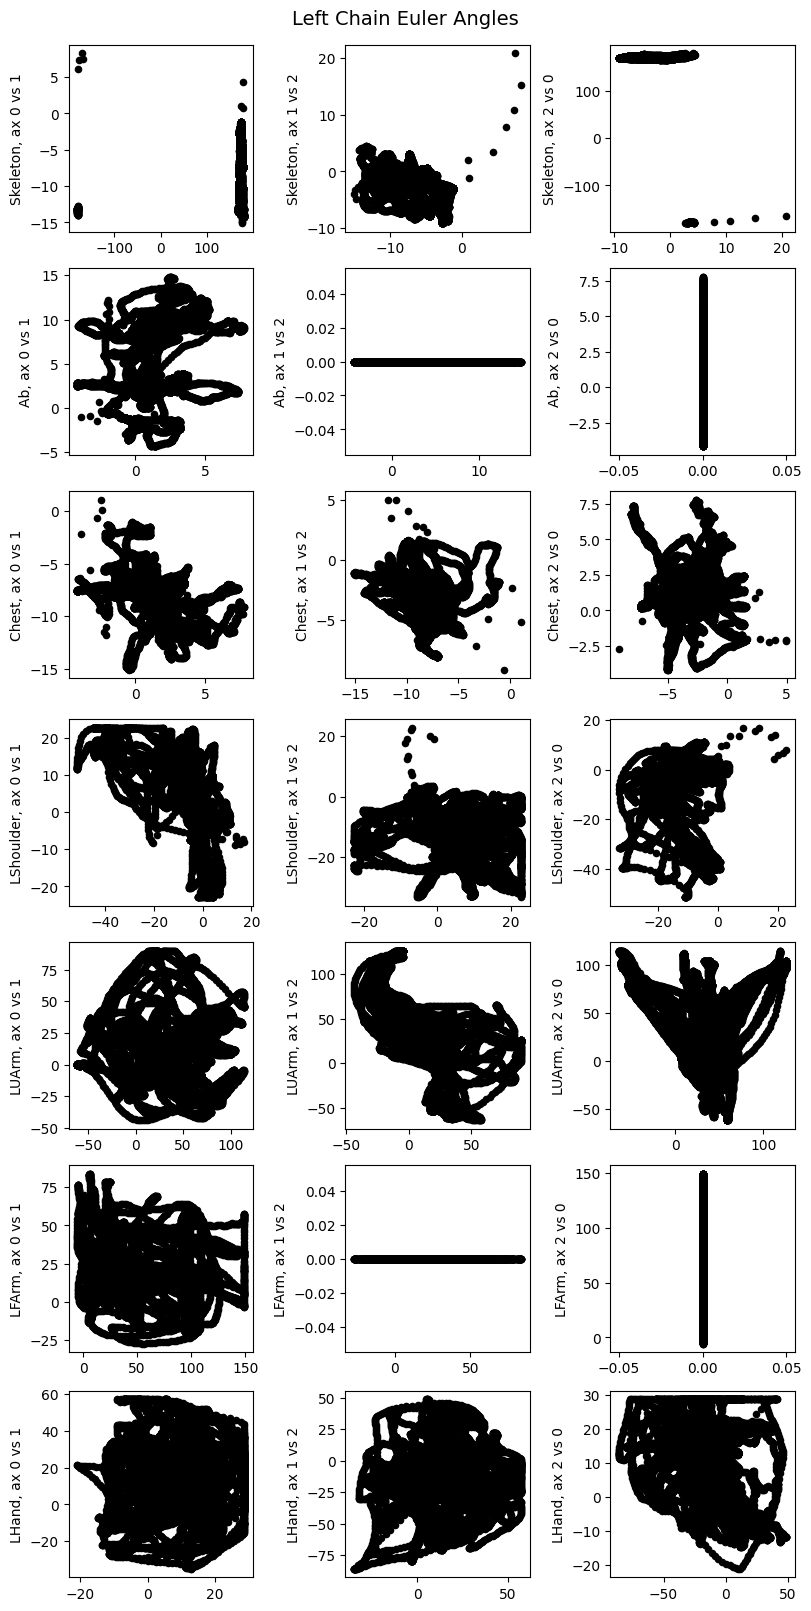

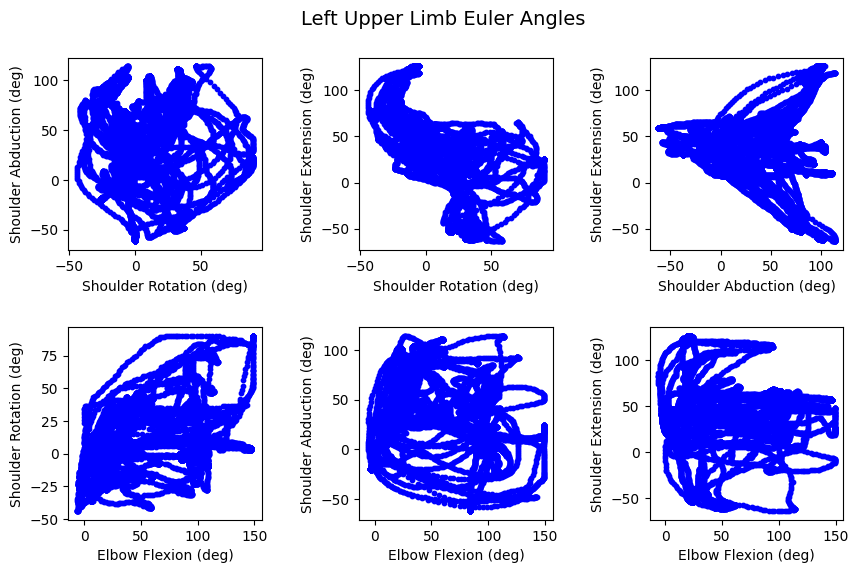

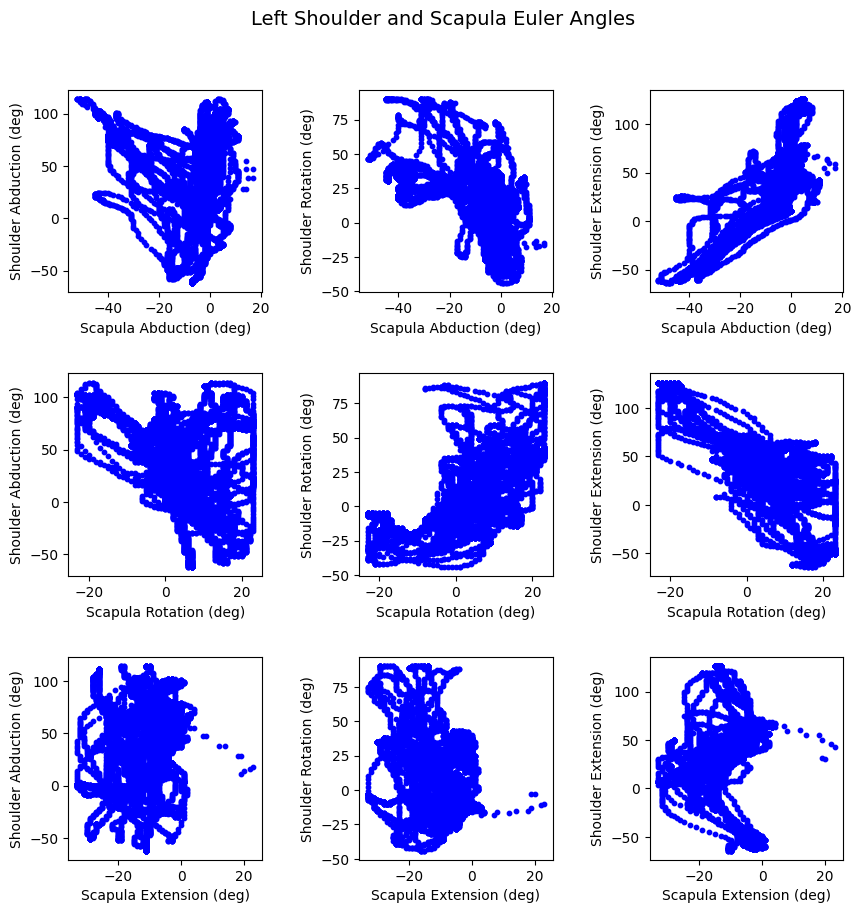

In [26]:
# Draw Euler angles for left chain
fig, axes = plt.subplots(len(chain_L), 3, figsize=(8, 16), constrained_layout=True, num='left_chain_angles')
fig.suptitle('Left Chain Euler Angles', fontsize=14)
for j in range(len(chain_L)):
    eul_to_draw = eul_left[:, j] * 180/np.pi
    # round to 2 decimal points
    eul_to_draw = np.around(eul_to_draw, 2)
    axes[j,0].scatter(eul_to_draw[:,0], eul_to_draw[:,1], label=f"{chain_L[j]}, 0, 1", marker='o', s=20, color='black')
    axes[j,1].scatter(eul_to_draw[:,1], eul_to_draw[:,2], label=f"{chain_L[j]}, 1, 2", marker='o', s=20, color='black')
    axes[j,2].scatter(eul_to_draw[:,2], eul_to_draw[:,0], label=f"{chain_L[j]}, 2, 0", marker='o', s=20, color='black')
    axes[j,0].set(ylabel=(f"{chain_L[j]}, ax 0 vs 1"))
    axes[j,1].set(ylabel=(f"{chain_L[j]}, ax 1 vs 2"))
    axes[j,2].set(ylabel=(f"{chain_L[j]}, ax 2 vs 0"))

# Draw Euler angles for left upper limb
sc_abd = np.around(eul_left[:,3,0] * 180/np.pi)
sc_rot = np.around(eul_left[:,3,1] * 180/np.pi)
sc_ext = np.around(eul_left[:,3,2] * 180/np.pi)
sh_rot = np.around(eul_left[:,4,1] * 180/np.pi)
sh_abd = np.around(eul_left[:,4,0] * 180/np.pi)
sh_ext = np.around(eul_left[:,4,2] * 180/np.pi)
el_fle = np.around(eul_left[:,5,0] * 180/np.pi)
el_sup = np.around(eul_left[:,5,1] * 180/np.pi)

joint_names = ['Hip', 'Abdomen', 'Chest', 'Scapula', 'Shoulder', 'Elbow', 'Wrist']
# eul_left.shape = (n, 7, 3)
print("{:<20} {:<10} {:<10} {:<10}".format("Joint:", "xyz", "min", "max"))
for j in range(3, len(chain_R)):
    print()
    for k in range(3):
        eul_min = min(eul_left[:,j,k]) * 180/np.pi
        eul_max = max(eul_left[:,j,k]) * 180/np.pi
        print("{:<20} {:<10} {:<10} {:<10}".format('R_' + joint_names[j], k, str(np.around(eul_min, 2)), str(np.around(eul_max, 2))))
print('\n\n')

fig2, axes2 = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True, num='left_arm_angles')
fig2.suptitle('Left Upper Limb Euler Angles', fontsize=14, y=0.96)
fig2.subplots_adjust(wspace=0.5, hspace=0.4)
axes2[0,0].scatter(sh_rot[:], sh_abd[:], marker='o', s=10, color='blue')
axes2[0,0].set(xlabel='Shoulder Rotation (deg)', ylabel='Shoulder Abduction (deg)')
axes2[0,1].scatter(sh_rot[:], sh_ext[:], marker='o', s=10, color='blue')
axes2[0,1].set(xlabel='Shoulder Rotation (deg)', ylabel='Shoulder Extension (deg)')
axes2[0,2].scatter(sh_abd[:], sh_ext[:], marker='o', s=10, color='blue')
axes2[0,2].set(xlabel='Shoulder Abduction (deg)', ylabel='Shoulder Extension (deg)')
axes2[1,0].scatter(el_fle[:], sh_rot[:], marker='o', s=10, color='blue')
axes2[1,0].set(xlabel='Elbow Flexion (deg)', ylabel='Shoulder Rotation (deg)')
axes2[1,1].scatter(el_fle[:], sh_abd[:], marker='o', s=10, color='blue')
axes2[1,1].set(xlabel='Elbow Flexion (deg)', ylabel='Shoulder Abduction (deg)')
axes2[1,2].scatter(el_fle[:], sh_ext[:], marker='o', s=10, color='blue')
axes2[1,2].set(xlabel='Elbow Flexion (deg)', ylabel='Shoulder Extension (deg)')

# Draw Euler angles for shoulder and scapula
fig3, axes3 = plt.subplots(3, 3, figsize=(10, 10), constrained_layout=True, num='left_shoulder_angles')
fig3.suptitle('Left Shoulder and Scapula Euler Angles', fontsize=14, y=0.96)
fig3.subplots_adjust(wspace=0.5, hspace=0.4)
axes3[0,0].scatter(sc_abd[:], sh_abd[:], marker='o', s=10, color='blue')
axes3[0,0].set(xlabel='Scapula Abduction (deg)', ylabel='Shoulder Abduction (deg)')
axes3[0,1].scatter(sc_abd[:], sh_rot[:], marker='o', s=10, color='blue')
axes3[0,1].set(xlabel='Scapula Abduction (deg)', ylabel='Shoulder Rotation (deg)')
axes3[0,2].scatter(sc_abd[:], sh_ext[:], marker='o', s=10, color='blue')
axes3[0,2].set(xlabel='Scapula Abduction (deg)', ylabel='Shoulder Extension (deg)')
axes3[1,0].scatter(sc_rot[:], sh_abd[:], marker='o', s=10, color='blue')
axes3[1,0].set(xlabel='Scapula Rotation (deg)', ylabel='Shoulder Abduction (deg)')
axes3[1,1].scatter(sc_rot[:], sh_rot[:], marker='o', s=10, color='blue')
axes3[1,1].set(xlabel='Scapula Rotation (deg)', ylabel='Shoulder Rotation (deg)')
axes3[1,2].scatter(sc_rot[:], sh_ext[:], marker='o', s=10, color='blue')
axes3[1,2].set(xlabel='Scapula Rotation (deg)', ylabel='Shoulder Extension (deg)')
axes3[2,0].scatter(sc_ext[:], sh_abd[:], marker='o', s=10, color='blue')
axes3[2,0].set(xlabel='Scapula Extension (deg)', ylabel='Shoulder Abduction (deg)')
axes3[2,1].scatter(sc_ext[:], sh_rot[:], marker='o', s=10, color='blue')
axes3[2,1].set(xlabel='Scapula Extension (deg)', ylabel='Shoulder Rotation (deg)')
axes3[2,2].scatter(sc_ext[:], sh_ext[:], marker='o', s=10, color='blue')
axes3[2,2].set(xlabel='Scapula Extension (deg)', ylabel='Shoulder Extension (deg)')


# save figures with csv file name
# fig.savefig(f'../data/figures/{npz_file.split("/")[-1].split("_")[0]}_left_chain_angles.png')
# fig2.savefig(f'../data/figures/{npz_file.split("/")[-1].split("_")[0]}_left_arm_angles.png')

plt.show()

Joint:               xyz        min        max       

R_Scapula            0          -34.57     12.52     
R_Scapula            1          -22.92     22.92     
R_Scapula            2          -21.63     28.14     

R_Shoulder           0          -60.87     109.01    
R_Shoulder           1          -52.09     89.95     
R_Shoulder           2          -60.46     121.04    

R_Elbow              0          -2.63      141.37    
R_Elbow              1          -32.2      84.5      
R_Elbow              2          -0.0       0.0       

R_Wrist              0          -24.6      28.65     
R_Wrist              1          -43.15     57.3      
R_Wrist              2          -85.92     81.11     





/tmp/ipykernel_21409/991187927.py:40: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig2.subplots_adjust(wspace=0.5, hspace=0.4)
/tmp/ipykernel_21409/991187927.py:59: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig3.subplots_adjust(wspace=0.5, hspace=0.4)


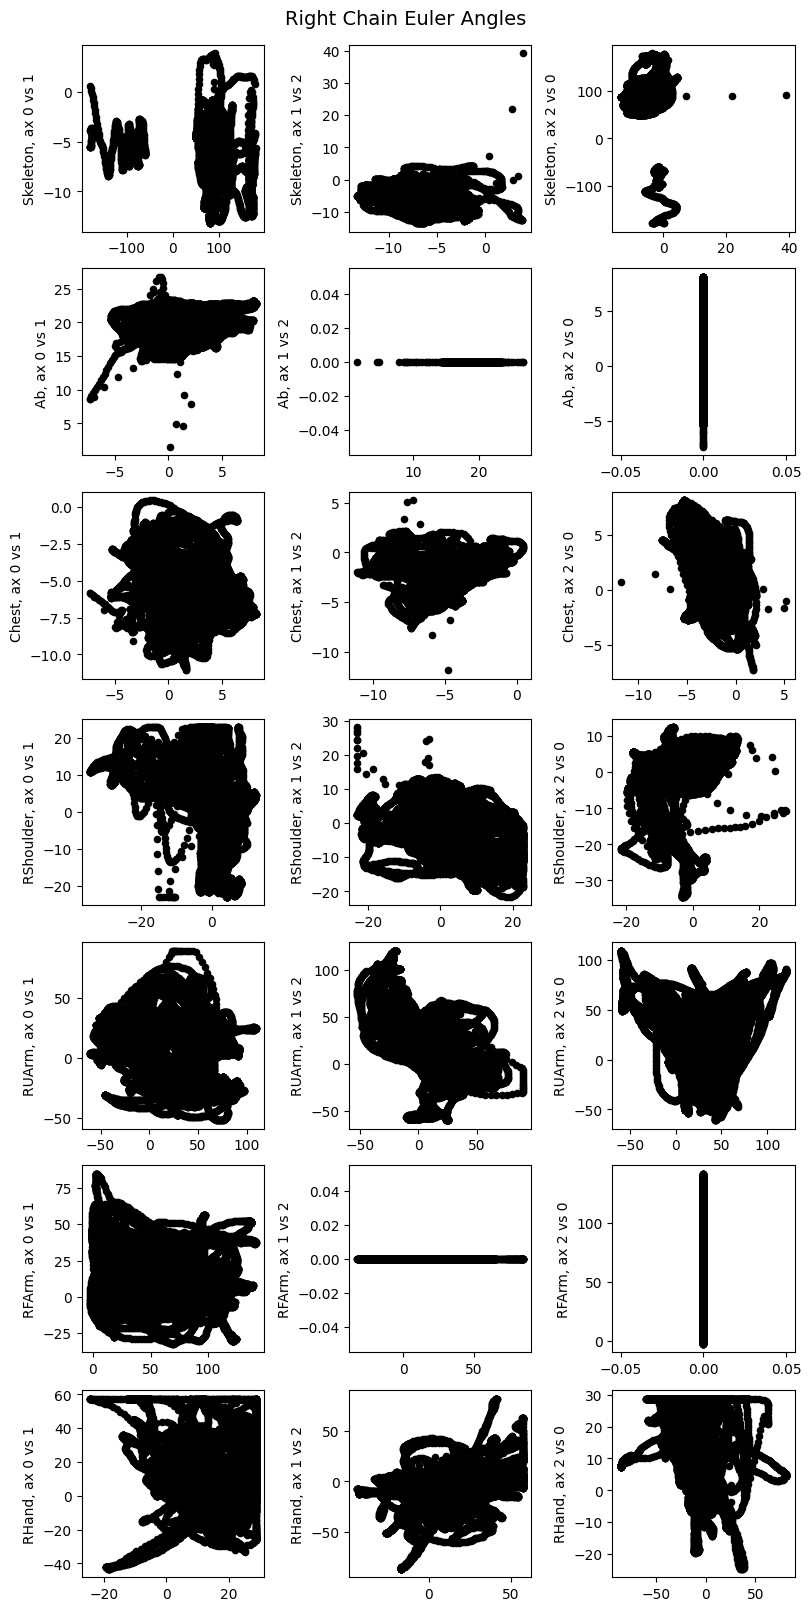

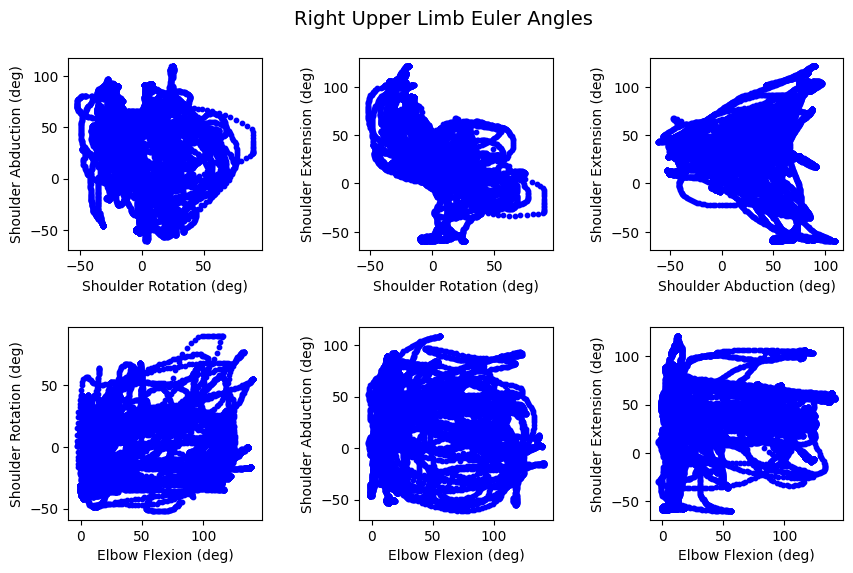

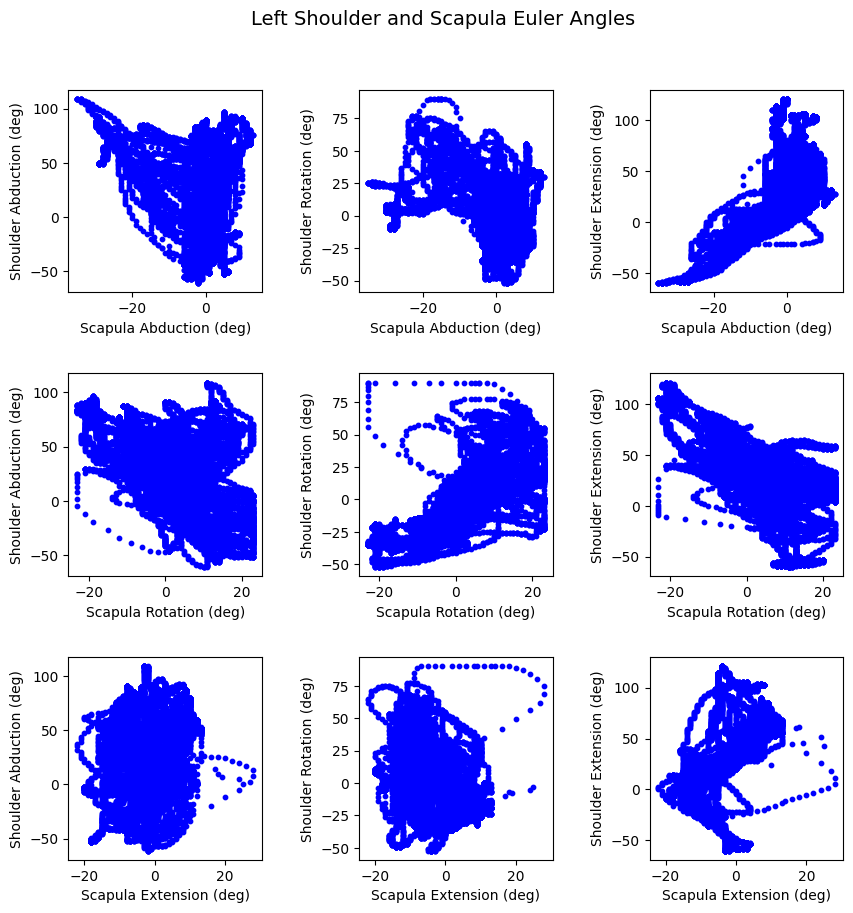

In [24]:
#%% Draw Euler angles for right chain
fig, axes = plt.subplots(len(chain_R), 3, figsize=(8, 16), constrained_layout=True, num='right_chain_angles')
fig.suptitle('Right Chain Euler Angles', fontsize=14)
for j in range(len(chain_R)):
    eul_to_draw = eul_right[:, j] * 180/np.pi
    # round to 2 decimal points
    eul_to_draw = np.around(eul_to_draw, 2)
    # axes[j,0].scatter(eul_to_draw[:len(time_cl),0], eul_to_draw[:len(time_cl),1], label=f"{chain_R[j]}, 0, 1", marker='o', s=20, color='black')
    # axes[j,0].scatter(eul_to_draw[len(time_cl):,0], eul_to_draw[len(time_cl):,1], label=f"{chain_R[j]}, 0, 1", marker='o', s=20, color='blue')
    axes[j,0].scatter(eul_to_draw[:,0], eul_to_draw[:,1], label=f"{chain_R[j]}, 0, 1", marker='o', s=20, color='black')
    axes[j,1].scatter(eul_to_draw[:,1], eul_to_draw[:,2], label=f"{chain_R[j]}, 1, 2", marker='o', s=20, color='black')
    axes[j,2].scatter(eul_to_draw[:,2], eul_to_draw[:,0], label=f"{chain_R[j]}, 2, 0", marker='o', s=20, color='black')
    axes[j,0].set(ylabel=(f"{chain_R[j]}, ax 0 vs 1"))
    axes[j,1].set(ylabel=(f"{chain_R[j]}, ax 1 vs 2"))
    axes[j,2].set(ylabel=(f"{chain_R[j]}, ax 2 vs 0"))

# Draw Euler angles for right upper limb
sc_abd = np.around(eul_right[:,3,0] * 180/np.pi)
sc_rot = np.around(eul_right[:,3,1] * 180/np.pi)
sc_ext = np.around(eul_right[:,3,2] * 180/np.pi)
sh_rot = np.around(eul_right[:,4,1] * 180/np.pi)
sh_abd = np.around(eul_right[:,4,0] * 180/np.pi)
sh_ext = np.around(eul_right[:,4,2] * 180/np.pi)
el_fle = np.around(eul_right[:,5,0] * 180/np.pi)
el_sup = np.around(eul_right[:,5,1] * 180/np.pi)

joint_names = ['Hip', 'Abdomen', 'Chest', 'Scapula', 'Shoulder', 'Elbow', 'Wrist']
# eul_left.shape = (n, 7, 3)
print("{:<20} {:<10} {:<10} {:<10}".format("Joint:", "xyz", "min", "max"))
for j in range(3, len(chain_R)):
    print()
    for k in range(3):
        eul_min = min(eul_right[:,j,k]) * 180/np.pi
        eul_max = max(eul_right[:,j,k]) * 180/np.pi
        print("{:<20} {:<10} {:<10} {:<10}".format('R_' + joint_names[j], k, str(np.around(eul_min, 2)), str(np.around(eul_max, 2))))
print('\n\n')

fig2, axes2 = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True, num='right_arm_angles')
fig2.suptitle('Right Upper Limb Euler Angles', fontsize=14, y=0.96)
fig2.subplots_adjust(wspace=0.5, hspace=0.4)

axes2[0,0].scatter(sh_rot[:], sh_abd[:], marker='o', s=10, color='blue')
axes2[0,0].set(xlabel='Shoulder Rotation (deg)', ylabel='Shoulder Abduction (deg)')
axes2[0,1].scatter(sh_rot[:], sh_ext[:], marker='o', s=10, color='blue')
axes2[0,1].set(xlabel='Shoulder Rotation (deg)', ylabel='Shoulder Extension (deg)')
axes2[0,2].scatter(sh_abd[:], sh_ext[:], marker='o', s=10, color='blue')
axes2[0,2].set(xlabel='Shoulder Abduction (deg)', ylabel='Shoulder Extension (deg)')

axes2[1,0].scatter(el_fle[:], sh_rot[:], marker='o', s=10, color='blue')
axes2[1,0].set(xlabel='Elbow Flexion (deg)', ylabel='Shoulder Rotation (deg)')
axes2[1,1].scatter(el_fle[:], sh_abd[:], marker='o', s=10, color='blue')
axes2[1,1].set(xlabel='Elbow Flexion (deg)', ylabel='Shoulder Abduction (deg)')
axes2[1,2].scatter(el_fle[:], sh_ext[:], marker='o', s=10, color='blue')
axes2[1,2].set(xlabel='Elbow Flexion (deg)', ylabel='Shoulder Extension (deg)')

# Draw Euler angles for shoulder and scapula
fig3, axes3 = plt.subplots(3, 3, figsize=(10, 10), constrained_layout=True, num='left_shoulder_angles')
fig3.suptitle('Left Shoulder and Scapula Euler Angles', fontsize=14, y=0.96)
fig3.subplots_adjust(wspace=0.5, hspace=0.4)
axes3[0,0].scatter(sc_abd[:], sh_abd[:], marker='o', s=10, color='blue')
axes3[0,0].set(xlabel='Scapula Abduction (deg)', ylabel='Shoulder Abduction (deg)')
axes3[0,1].scatter(sc_abd[:], sh_rot[:], marker='o', s=10, color='blue')
axes3[0,1].set(xlabel='Scapula Abduction (deg)', ylabel='Shoulder Rotation (deg)')
axes3[0,2].scatter(sc_abd[:], sh_ext[:], marker='o', s=10, color='blue')
axes3[0,2].set(xlabel='Scapula Abduction (deg)', ylabel='Shoulder Extension (deg)')
axes3[1,0].scatter(sc_rot[:], sh_abd[:], marker='o', s=10, color='blue')
axes3[1,0].set(xlabel='Scapula Rotation (deg)', ylabel='Shoulder Abduction (deg)')
axes3[1,1].scatter(sc_rot[:], sh_rot[:], marker='o', s=10, color='blue')
axes3[1,1].set(xlabel='Scapula Rotation (deg)', ylabel='Shoulder Rotation (deg)')
axes3[1,2].scatter(sc_rot[:], sh_ext[:], marker='o', s=10, color='blue')
axes3[1,2].set(xlabel='Scapula Rotation (deg)', ylabel='Shoulder Extension (deg)')
axes3[2,0].scatter(sc_ext[:], sh_abd[:], marker='o', s=10, color='blue')
axes3[2,0].set(xlabel='Scapula Extension (deg)', ylabel='Shoulder Abduction (deg)')
axes3[2,1].scatter(sc_ext[:], sh_rot[:], marker='o', s=10, color='blue')
axes3[2,1].set(xlabel='Scapula Extension (deg)', ylabel='Shoulder Rotation (deg)')
axes3[2,2].scatter(sc_ext[:], sh_ext[:], marker='o', s=10, color='blue')
axes3[2,2].set(xlabel='Scapula Extension (deg)', ylabel='Shoulder Extension (deg)')

# save figures with csv file name
fig.savefig(f'../data/figures/{npz_file.split("/")[-1].split("_")[0]}_right_chain_angles.png')
fig2.savefig(f'../data/figures/{npz_file.split("/")[-1].split("_")[0]}_right_arm_angles.png')

plt.show()

In [6]:
# #%% Visualization of joint locations at time t
# t = 10000
# eul_seq = 'rzxy'

# # Offset angle between strnm_dir_R/L and strnm_dir_H
# strnm_dir_R = skl_R[('RShoulder', 'Position')] - skl_R[('Chest', 'Position')]
# strnm_dir_L = skl_L[('LShoulder', 'Position')] - skl_L[('Chest', 'Position')]
# strnm_dir_H = skl_H[('Neck', 'Position')] - skl_H[('Chest', 'Position')]
# strnm_ang_R = np.arccos(np.dot(strnm_dir_R.iloc[t], strnm_dir_H.iloc[t])/(np.linalg.norm(strnm_dir_R.iloc[t])*np.linalg.norm(strnm_dir_H.iloc[t])))
# strnm_ang_L = np.arccos(np.dot(strnm_dir_L.iloc[t], strnm_dir_H.iloc[t])/(np.linalg.norm(strnm_dir_L.iloc[t])*np.linalg.norm(strnm_dir_H.iloc[t])))

# def get_positions(skl, chain):  
#     positions = []
#     for j in range(len(chain)):
#         pos = skl[(chain[j], 'Position')].iloc[t]
#         positions.append(np.array(pos))
#     return positions - positions[0]

# def get_euler(skl, chain):  
#     eul = []
#     R_prox = np.eye(3)
#     for j in range(len(chain)):
#         q = skl[(chain[j], 'Rotation')].iloc[t]
#         R_global = quaternion_matrix(q)[:3,:3]
#         R_rel = R_prox.T @ R_global
#         R_prox = R_global
#         eul_values = euler_from_matrix(R_rel, axes=eul_seq)
#         # (ang1, ang2, ang3) = euler_from_matrix(R_rel, axes=eul_seq)
#         # eul_values = np.array([ang1, ang2, ang3])
#         eul.append(eul_values)
#     return np.array(eul)

# def forward_kinematics(skl, chain): 
#     bone_pos = get_positions(skl, chain)
#     bone_length = np.linalg.norm(np.diff(bone_pos, axis=0), axis=1)
#     eul_angles = get_euler(skl, chain)
    
#     fk_pose = np.zeros((len(eul_angles), 3))
#     pos_prox = np.zeros(3)
#     R_prox = np.eye(3)
#     fk_pose[0] = bone_pos[0]
#     for i in range(2):
#         R_rel = euler_matrix(eul_angles[i, 0], eul_angles[i, 1], eul_angles[i, 2], axes=eul_seq)[:3, :3]
#         R_prox = R_prox @ R_rel
#         pos_prox += R_prox @ np.array([0, 0, bone_length[i]])
#         fk_pose[i+1] = pos_prox

#     for i in range(2, len(eul_angles)-1):
#         R_rel = euler_matrix(eul_angles[i, 0], eul_angles[i, 1], eul_angles[i, 2], axes=eul_seq)[:3, :3]
#         R_prox = R_prox @ R_rel
#         if chain==chain_R:  
#             if i==2:
#                 R_off = euler_matrix(0, 0, strnm_ang_R, axes='szxy')[:3, :3]
#                 pos_prox += R_prox @ R_off @ np.array([0, 0, bone_length[i]])
#             else:
#                 pos_prox += R_prox @ np.array([bone_length[i], 0, 0])
#         elif chain==chain_L:
#             if i==2:
#                 R_off = euler_matrix(0, 0, -strnm_ang_L, axes='szxy')[:3, :3]
#                 pos_prox += R_prox @ R_off @ np.array([0, 0, bone_length[i]])
#             else:
#                 pos_prox += R_prox @ np.array([-bone_length[i], 0, 0])
#         elif chain==chain_H:
#             pos_prox += R_prox @ np.array([0, 0, bone_length[i]])
#         fk_pose[i+1] = pos_prox
#     return fk_pose

# # Get bone positions from raw data
# pos_raw_R = get_positions(skl_R, chain_R)
# pos_raw_L = get_positions(skl_L, chain_L)
# pos_raw_H = get_positions(skl_H, chain_H)

# # Get bone positions using forward kinematics
# pos_fk_R = forward_kinematics(skl_R, chain_R)
# pos_fk_L = forward_kinematics(skl_L, chain_L)
# pos_fk_H = forward_kinematics(skl_H, chain_H)

# eul_angles_R = get_euler(skl_R, chain_R)
# eul_angles_L = get_euler(skl_L, chain_L)
# eul_angles_H = get_euler(skl_H, chain_H)

# print("{:<10} {:<25} {:<25} {:<25}".format("pos_R:", "Raw", "FK", "Euler Angles"))
# for j in range(len(chain_R)):
#     print("{:<10} {:<25} {:<25} {:<25}".format(chain_R[j], str(np.around(pos_raw_R[j], 2)), str(np.around(pos_fk_R[j], 2)), str(np.around(eul_angles_R[j]*180/np.pi, 2))))
# print("{:<10} {:<25} {:<25} {:<25}".format("pos_L:", "Raw", "FK", "Euler Angles"))
# for j in range(len(chain_L)):
#     print("{:<10} {:<25} {:<25} {:<25}".format(chain_L[j], str(np.around(pos_raw_L[j], 2)), str(np.around(pos_fk_L[j], 2)), str(np.around(eul_angles_L[j]*180/np.pi, 2))))        
# for j in range(len(chain_H)):
#     print("{:<10} {:<25} {:<25} {:<25}".format(chain_H[j], str(np.around(pos_raw_H[j], 2)), str(np.around(pos_fk_H[j], 2)), str(np.around(eul_angles_H[j]*180/np.pi, 2))))

# # Plot positions using raw position data and forward kinematics
# fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(11, 4.5), constrained_layout=True, num='Joint Locations')
# # fig.subplots_adjust(left=-0.5, wspace=0.08, right=1.2)
# for ax in axes:
#     ax.set(xlabel='X', ylabel='Y', zlabel='Z', xlim=(-500, 500), ylim=(-500, 500), zlim=(-100, 900))
#     ax.view_init(elev=25, azim=150)
# ax1, ax2 = axes[0], axes[1]
# ax1.set_title('Joint Locations Using Position Data', pad=8)
# ax2.set_title('Joint Locations Using Forward Kinematics', pad=8)
# # colors = ['k', 'y', 'm', 'c', 'r', 'g', 'b']
# colors_R = ['black', 'orange', 'navy', 'cyan', 'red', 'green', 'blue']
# colors_L = ['black', 'orange', 'navy', 'purple', 'magenta', 'lime', 'teal']
# for j in range(len(chain_R)):
#     ax1.scatter(pos_raw_R[j][0], pos_raw_R[j][1], pos_raw_R[j][2], label=f"{chain_R[j]}, Raw", marker='*', s=50, color=colors_R[j])
#     ax1.scatter(pos_raw_L[j][0], pos_raw_L[j][1], pos_raw_L[j][2], label=f"{chain_L[j]}, Raw", marker='*', s=50, color=colors_L[j])
#     ax2.scatter(pos_fk_R[j][0], pos_fk_R[j][1], pos_fk_R[j][2], label=f"{chain_R[j]}, FK", marker='o', s=50, color=colors_R[j])
#     ax2.scatter(pos_fk_L[j][0], pos_fk_L[j][1], pos_fk_L[j][2], label=f"{chain_L[j]}, FK", marker='o', s=50, color=colors_L[j])
#     if j!=0:
#         ax1.plot([pos_raw_R[j][0], pos_raw_R[j-1][0]], [pos_raw_R[j][1], pos_raw_R[j-1][1]], [pos_raw_R[j][2], pos_raw_R[j-1][2]], 'k')
#         ax1.plot([pos_raw_L[j][0], pos_raw_L[j-1][0]], [pos_raw_L[j][1], pos_raw_L[j-1][1]], [pos_raw_L[j][2], pos_raw_L[j-1][2]], 'b')
#         ax2.plot([pos_fk_R[j][0], pos_fk_R[j-1][0]], [pos_fk_R[j][1], pos_fk_R[j-1][1]], [pos_fk_R[j][2], pos_fk_R[j-1][2]], 'k')
#         ax2.plot([pos_fk_L[j][0], pos_fk_L[j-1][0]], [pos_fk_L[j][1], pos_fk_L[j-1][1]], [pos_fk_L[j][2], pos_fk_L[j-1][2]], 'b')
# for j in range(1, len(chain_H)):
#     ax1.scatter(pos_raw_H[j][0], pos_raw_H[j][1], pos_raw_H[j][2], label=f"{chain_H[j]}, Raw", marker='*', s=50, color='black')
#     ax2.scatter(pos_fk_H[j][0], pos_fk_H[j][1], pos_fk_H[j][2], label=f"{chain_H[j]}, FK", marker='o', s=50, color='black')
#     if j!=0:
#         ax1.plot([pos_raw_H[j][0], pos_raw_H[j-1][0]], [pos_raw_H[j][1], pos_raw_H[j-1][1]], [pos_raw_H[j][2], pos_raw_H[j-1][2]], 'k--')
#         ax2.plot([pos_fk_H[j][0], pos_fk_H[j-1][0]], [pos_fk_H[j][1], pos_fk_H[j-1][1]], [pos_fk_H[j][2], pos_fk_H[j-1][2]], 'k--')
# ax2.legend(handles=
#     [Line2D([],[], color=colors_R[j], linestyle='', marker='o', markersize=8, label=f"{chain_R[j]}") for j in range(len(chain_R))] + 
#     [Line2D([],[], color=colors_L[j], linestyle='', marker='o', markersize=8, label=f"{chain_L[j]}") for j in range(3, len(chain_L))] + 
#     [Line2D([],[], color='black', linestyle='-', label='Bones')],  loc='right', bbox_to_anchor=(1.4, 0.5))
# plt.show()
